In [1]:
### Change dir

import os
os.chdir(os.pardir)

In [2]:
### import modules

import numpy as np
import pandas as pd

### read dataset
df = pd.read_excel('raw_data/refined_data.xlsx')

print("===== summary =====")
print(df)

===== summary =====
                                   ID   EXT   NEU   AGR   CON   OPN
0    00419a4c96b32cd63b2c7196da761274  1.90  4.15  3.15  4.65  3.45
1    02c37028a782cfda660c7243e45244bb  2.05  4.00  2.20  2.20  3.75
2    03133a828cd0cf52e3752813ce5d818f  3.84  3.55  2.85  4.32  3.45
3    03e6c4eca4269c183fa0e1780f73faba  3.20  3.60  3.85  4.35  4.80
4    06b055f8e2bca96496514891057913c3  2.85  2.35  3.35  4.70  3.35
..                                ...   ...   ...   ...   ...   ...
245  f83aa7290cf3ae8ed75d6aee5ebbb559  2.65  1.70  3.95  3.00  3.15
246  fbe5aa478508d1dc931427ade5d9e1b4  3.25  2.75  2.25  4.00  4.00
247  fc1c9fb6c64740edcbbf8cfe9dde8b02  3.55  2.25  3.90  2.80  4.00
248  fe22087986fdcc65939c793fe0ec90a9  3.45  2.55  3.15  3.50  2.90
249  fffafe151f07a30a0ede2038a897b680  3.05  1.80  3.35  2.95  4.35

[250 rows x 6 columns]


In [4]:
import pandas as pd
import numpy as np

# DataFrame to Numpy array
data = df.iloc[:, 1:].values

# calculation pearson correlation coefficient about all items
corr_matrix = np.corrcoef(data)

# save result of cosine similarity (i != j)
corr_results = []

# pandas DataFrame
for i in range(len(corr_matrix)):
    for j in range(i + 1, len(corr_matrix)):
        corr_results.append([i + 1, j + 1, corr_matrix[i, j]])

# pandas DataFrame
corr_df = pd.DataFrame(corr_results, columns=["Row1", "Row2", "Correlation Coefficient"])

# save CSV file
corr_df.to_csv('result/pearson.csv', index=False)

print("Data saved as a CSV file.")


Data saved as a CSV file.


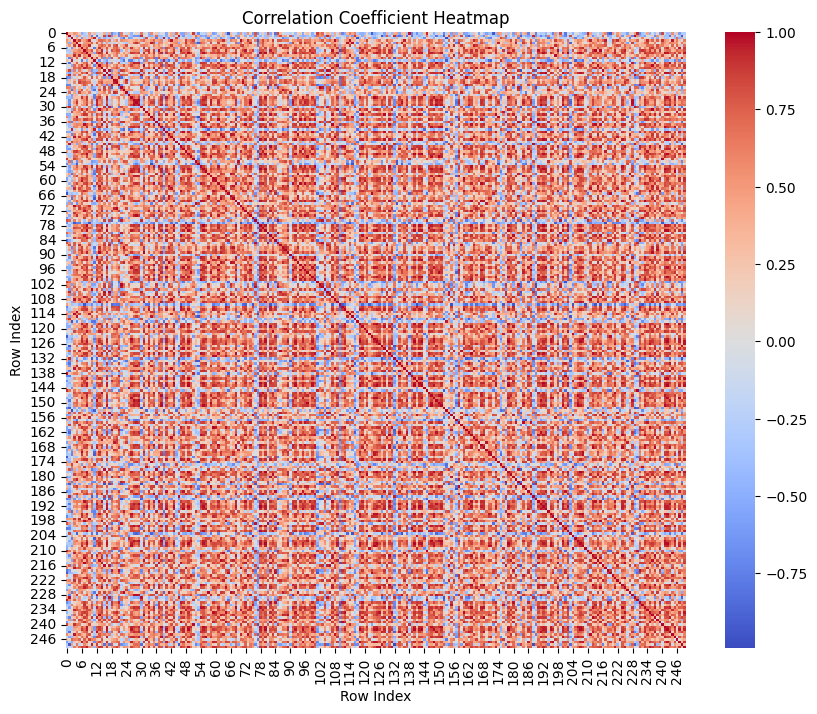

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# to pandas DataFrame
corr_df_matrix = pd.DataFrame(corr_matrix, index=df.index, columns=df.index)

# heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title('Correlation Coefficient Heatmap')
plt.xlabel('Row Index')
plt.ylabel('Row Index')
plt.show()
